In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

In [172]:
#df = pd.read_excel("data/91508831221_2022-08-01-2022-09-05.xlsx")
df = pd.read_excel("data/91508831221_2022-01-01-2022-09-05.xlsx")

In [173]:
df.columns=['BokfDatum', 'Beskrivning','Belopp', 'Saldo']

In [174]:
df.iloc[:3,]=np.nan
df=df.dropna(how="all")


In [222]:
df= df.sort_values(by='BokfDatum')

In [223]:
df

,BokfDatum,Beskrivning,Belopp,Saldo,kategori,month
1062,2022-01-03,"2021-12-30 ICA NARA LUNDEN, GOTEBORG",-173.8,27144.62,FOOD,Januari
1054,2022-01-03,"2021-12-30 ICA FOCUS, GOTEBORG",-467.95,24693.85,FOOD,Januari
1050,2022-01-03,"2022-01-01 ICA KVANTUM EMPORIA, MALMO",-618.49,21759.36,FOOD,Januari
1043,2022-01-05,"2022-01-04 ICA KVANTUM EMPORIA, MALMO",-610.45,5392.02,FOOD,Januari
1037,2022-01-07,"2022-01-06 WILLYS VELLINGE, VELLINGE",-226.67,4922.63,FOOD,Januari
...,...,...,...,...,...,...
15,2022-09-02,"2022-09-01 COOP VÄSTRA HAMNEN, ARLÖV",-105.07,34806.26,FOOD,September
8,2022-09-05,"2022-09-02 WILLYS VELLINGE, VELLINGE",-30.84,33793.42,FOOD,September
7,2022-09-05,"2022-09-02 MAXI ICA STORMARKNAD MALM, MALMO",-1055.61,32737.81,FOOD,September
6,2022-09-05,"2022-09-03 ICA KVANTUM VELLINGE, VELLINGE",-22.8,32715.01,FOOD,September


In [157]:
spend_map={'ICA':'FOOD',
          'COOP':'FOOD',
          'WILLYS':'FOOD'}

In [171]:
month_map={'2022-01': 'Januari',
           '2022-02': 'Februari',
           '2022-03': 'Mars',
           '2022-04': 'April',
           '2022-05': 'Maj',
           '2022-06': 'Juni',
           '2022-07': 'Juli',
           '2022-08': 'Augusti',
          '2022-09': 'September',
          '2022-10': 'Oktober',
          '2022-11': 'November',
           '2022-12': 'December'}

In [158]:
def like_function(x):
    group = "unknown"
    for key in spend_map:
        if key in x:
            group = spend_map[key]
            break
    return group

In [160]:
def like_function2(x):
    group = "unknown"
    for key in month_map:
        if key in x:
            group = month_map[key]
            break
    return group
    

In [224]:
df['kategori'] = df.Beskrivning.apply(like_function)

In [225]:
df['month']= df.BokfDatum.apply(like_function2)

In [226]:
df

,BokfDatum,Beskrivning,Belopp,Saldo,kategori,month
1062,2022-01-03,"2021-12-30 ICA NARA LUNDEN, GOTEBORG",-173.8,27144.62,FOOD,Januari
1054,2022-01-03,"2021-12-30 ICA FOCUS, GOTEBORG",-467.95,24693.85,FOOD,Januari
1050,2022-01-03,"2022-01-01 ICA KVANTUM EMPORIA, MALMO",-618.49,21759.36,FOOD,Januari
1043,2022-01-05,"2022-01-04 ICA KVANTUM EMPORIA, MALMO",-610.45,5392.02,FOOD,Januari
1037,2022-01-07,"2022-01-06 WILLYS VELLINGE, VELLINGE",-226.67,4922.63,FOOD,Januari
...,...,...,...,...,...,...
15,2022-09-02,"2022-09-01 COOP VÄSTRA HAMNEN, ARLÖV",-105.07,34806.26,FOOD,September
8,2022-09-05,"2022-09-02 WILLYS VELLINGE, VELLINGE",-30.84,33793.42,FOOD,September
7,2022-09-05,"2022-09-02 MAXI ICA STORMARKNAD MALM, MALMO",-1055.61,32737.81,FOOD,September
6,2022-09-05,"2022-09-03 ICA KVANTUM VELLINGE, VELLINGE",-22.8,32715.01,FOOD,September


In [227]:
grouped = df['Belopp'].groupby(df['kategori'])

In [228]:
df = df[df['kategori']=='FOOD']

In [229]:
grouped.sum()

kategori
FOOD   -73341.11
Name: Belopp, dtype: object

In [230]:
grouped2= df['Belopp'].groupby([df['kategori'],df['month']])

In [231]:
grouped2.sum()

kategori  month    
FOOD      April        -6707.62
          Augusti     -11758.88
          Februari     -5063.25
          Januari     -10994.03
          Juli         -7351.85
          Juni        -11660.32
          Maj          -9344.37
          Mars         -8726.27
          September    -1734.52
Name: Belopp, dtype: object

In [217]:
grouped2 = df.groupby([df['kategori'],df['month']])

In [218]:
grouped2['Belopp'].sum()

kategori  month    
FOOD      April        -6707.62
          Augusti     -11758.88
          Februari     -5063.25
          Januari     -10994.03
          Juli         -7351.85
          Juni        -11660.32
          Maj          -9344.37
          Mars         -8726.27
          September    -1734.52
Name: Belopp, dtype: object

In [198]:
xf['Belopp']

kategori  month    
FOOD      April        -6707.62
          Augusti     -11758.88
          Februari     -5063.25
          Januari     -10994.03
          Juli         -7351.85
          Juni        -11660.32
          Maj          -9344.37
          Mars         -8726.27
          September    -1734.52
Name: Belopp, dtype: object

In [199]:
xf

Belopp
kategori month              
FOOD     April      -6707.62
         Augusti   -11758.88
         Februari   -5063.25
         Januari   -10994.03
         Juli       -7351.85
         Juni      -11660.32
         Maj        -9344.37
         Mars       -8726.27
         September  -1734.52

In [207]:
xu = x.unstack()

In [242]:
xu.shape


(1, 9)

In [212]:
xu['April']

kategori
FOOD   -6707.62
Name: April, dtype: object

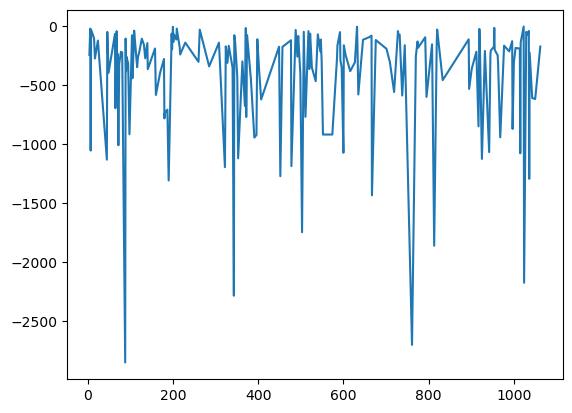

In [219]:
import matplotlib.pyplot as plt
data = df['Belopp']
plt.plot(data)

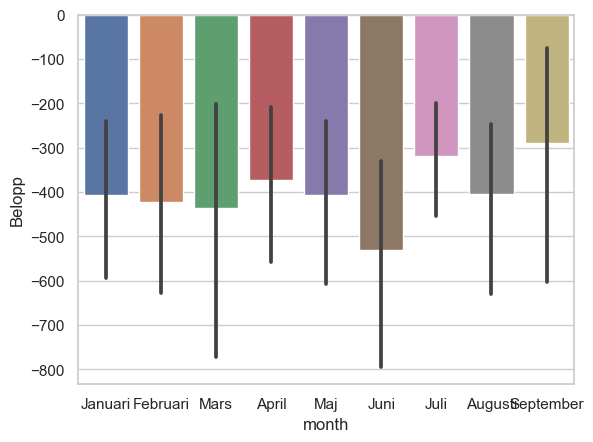

In [234]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=df["month"], y=df["Belopp"], data=df)
#ax = sns.catplot(x=df["month"], y=df["Belopp"], kind="box",data=df)